⎡    2⋅a      k⎤
⎢              ⎥
⎢ ⎛ 2    2⎞    ⎥
⎢-⎝a  + b ⎠    ⎥
⎢───────────  0⎥
⎣     k        ⎦


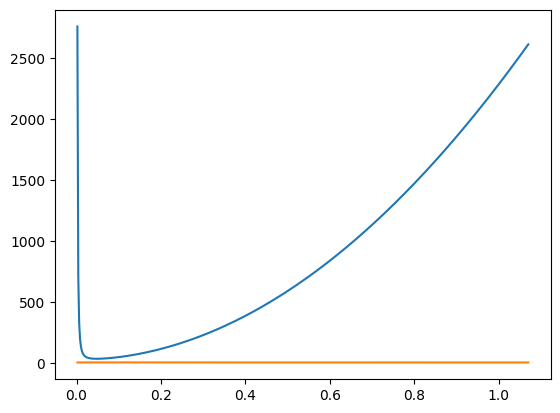

In [108]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
l1, l2, g, k, q = sp.symbols('l1 l2 g k q', positive=True, real=True)
p11, p12, p22 = sp.symbols('p11 p12 p22', real=True)
a = sp.symbols('a', real=True, negative=True)
b = sp.symbols('b', real=False)

# Define matrix A
A = sp.Matrix([[-l1, k],
               [-l2 - g, 0]])

substitute_A = {
    l1: -2*a,
    l2: (a**2 + b**2)/k - g
}

subs_b = {
    b : 0
}

A = A.subs(substitute_A)

sp.pprint(A)

# Symmetric matrix P = [[p11, p12], [p12, p22]]
P = sp.Matrix([[p11, p12],
               [p12, p22]])

# Identity matrix
I = sp.eye(2)

# Lyapunov equation: PA + A^T P = -qI
lhs = P * A + A.T * P
rhs = -I

# Solve the matrix equation
equations = sp.Eq(lhs, rhs)
solution = sp.solve(equations, (p11, p12, p22), dict=True)

sol = solution[0]
P_sol = sp.Matrix([[sol[p11], sol[p12]],
                   [sol[p12], sol[p22]]])

# Compute eigenvalues of the solution matrix
eigenvalues = P_sol.eigenvals()
lambda_P_funcs = [sp.lambdify((a, b, k, g), val, modules="numpy") for val in eigenvalues.keys()]

k_val = np.arange(1, 512)*2*np.pi/3000
a_val = -0.048
b_val = 0
plt.plot(k_val, lambda_P_funcs[0](a_val, b_val, k_val, 9.81))
plt.plot(k_val, lambda_P_funcs[1](a_val, b_val, k_val, 9.81))
# plt.ylim(0, 10)

# eigenvalues = A.eigenvals()
# print(eigenvalues)
# lambda_A_funcs = [sp.lambdify((a, b), val, modules="numpy") for val in eigenvalues.keys()]

# # # Example: evaluate first eigenvalue at some point
# # a_val, b_val, k_val, q_val, g_val = -1.0, 1.0, 2.0, 1.0, 0.5
# # val1 = lam_funcs[0](a_val, b_val, k_val, q_val, g_val)
# # val2 = lam_funcs[1](a_val, b_val, k_val, q_val, g_val)

# # print(f"Eigenvalue 1 at example point: {val1}")
# # print(f"Eigenvalue 2 at example point: {val2}")

# a_val = -1
# b_val = 0
# g_val = 9.81
# k_val = np.arange(1, 512)*2*np.pi/3000

# lambda_total = lambda_P_funcs[0](a_val, b_val, k_val, g_val)
# lambda_imag = np.imag(lambda_total)
# lambda_real = np.real(lambda_total)

# plt.plot(k_val, lambda_P_funcs[0](a_val, b_val, k_val, g_val))
# plt.plot(k_val, lambda_P_funcs[1](a_val, b_val, k_val, g_val))
# plt.grid()
# plt.ylim(0, 10)
# plt.show()

In [44]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)

# Define matrix A
A = sp.Matrix([[-l1, k],
               [-l1**2/4/k, 0]])

sp.pprint(A.eigenvals())

P = sp.Matrix([[p11, p12],
               [-p12, p11]])

p12_subs = {
    p12 : p11 * (k / l1 + l1 / 4 / k)
}

lyapunov = A.transpose()*P + P * A
lyapunov = lyapunov.subs(p12_subs)
sp.pprint(lyapunov)

sp.pprint(lyapunov.eigenvals())

latex_expr = latex(lyapunov.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print(markdown_block)

test = P + P.transpose()
sp.pprint(test)
sp.pprint(test.eigenvals())

⎧-l₁    ⎫
⎨────: 2⎬
⎩ 2     ⎭
⎡                                                                   2    ⎤
⎢                                                    ⎛k    l₁ ⎞   l₁ ⋅p₁₁⎥
⎢             -2⋅l₁⋅p₁₁               k⋅p₁₁ - l₁⋅p₁₁⋅⎜── + ───⎟ - ───────⎥
⎢                                                    ⎝l₁   4⋅k⎠     4⋅k  ⎥
⎢                                                                        ⎥
⎢                              2                                         ⎥
⎢               ⎛k    l₁ ⎞   l₁ ⋅p₁₁                                     ⎥
⎢k⋅p₁₁ + l₁⋅p₁₁⋅⎜── + ───⎟ - ───────                   0                 ⎥
⎣               ⎝l₁   4⋅k⎠     4⋅k                                       ⎦
{-l₁⋅p₁₁: 2}
```math
\left\{ - l_{1} p_{11} : 2\right\}
```
⎡2⋅p₁₁    0  ⎤
⎢            ⎥
⎣  0    2⋅p₁₁⎦
{2⋅p₁₁: 2}


```math
\left\{ - l_{1} p_{11} : 2\right\}
```

In [173]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
w, zeta = sp.symbols('omega zeta', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)

# Define matrix A
A = sp.Matrix([[-l1, k],
               [-g-l2, 0]])

A_subs = {
    l1 : 2 * w * zeta,
    l2 : w**2 / k - g
}
A = A.subs(A_subs)

P = sp.Matrix([[p11, 0],
               [p11, p11]])

p12_subs = {
    p12 : p11 * (k / l1 + l1 / 4 / k)
}

p12_subs_2 = {
    p12 : sp.sqrt(k**4*p11**2+w**4*p11**2)/2/k/w/zeta
}

lyapunov = A.transpose()*P + P * A
lyapunov_sym = (lyapunov.transpose() + lyapunov)/2

latex_expr = latex(lyapunov)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov")
print(markdown_block)

latex_expr = latex(lyapunov.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov eigenvals")
print(markdown_block)

latex_expr = latex((lyapunov+lyapunov.transpose())/2)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov sym")
print(markdown_block)

latex_expr = latex(lyapunov_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Eigenvals sym")
print(markdown_block)

P_sym = (P.transpose() + P)/2

latex_expr = latex(P_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("P_sym eigenvals")
print(markdown_block)

Lyapunov
```math
\left[\begin{matrix}- 4 \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11} - \frac{\omega^{2} p_{11}}{k}\\k p_{11} - 2 \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11}\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ \frac{p_{11} \left(k^{2} - 4 k \omega \zeta - \omega^{2}\right)}{2 k} - \frac{p_{11} \sqrt{5 k^{4} + 16 k^{2} \omega^{2} \zeta^{2} - 6 k^{2} \omega^{2} + 16 k \omega^{3} \zeta + 5 \omega^{4}}}{2 k} : 1, \  \frac{p_{11} \left(k^{2} - 4 k \omega \zeta - \omega^{2}\right)}{2 k} + \frac{p_{11} \sqrt{5 k^{4} + 16 k^{2} \omega^{2} \zeta^{2} - 6 k^{2} \omega^{2} + 16 k \omega^{3} \zeta + 5 \omega^{4}}}{2 k} : 1\right\}
```
Lyapunov sym
```math
\left[\begin{matrix}- 4 \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11} - \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k}\\k p_{11} - \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11}\end{matrix}\right]
```
Eigenvals sym
```math
\left\{ \frac{p_{11} \left(k^{2} - 4 k 

Lyapunov
```math
\left[\begin{matrix}- 4 \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11} - \frac{\omega^{2} p_{11}}{k}\\k p_{11} - 2 \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11}\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ \frac{p_{11} \left(k^{2} - 4 k \omega \zeta - \omega^{2}\right)}{2 k} - \frac{p_{11} \sqrt{5 k^{4} + 16 k^{2} \omega^{2} \zeta^{2} - 6 k^{2} \omega^{2} + 16 k \omega^{3} \zeta + 5 \omega^{4}}}{2 k} : 1, \  \frac{p_{11} \left(k^{2} - 4 k \omega \zeta - \omega^{2}\right)}{2 k} + \frac{p_{11} \sqrt{5 k^{4} + 16 k^{2} \omega^{2} \zeta^{2} - 6 k^{2} \omega^{2} + 16 k \omega^{3} \zeta + 5 \omega^{4}}}{2 k} : 1\right\}
```
Lyapunov sym
```math
\left[\begin{matrix}- 4 \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11} - \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k}\\k p_{11} - \omega p_{11} \zeta - \frac{\omega^{2} p_{11}}{k} & k p_{11}\end{matrix}\right]
```
Eigenvals sym
```math
\left\{ \frac{p_{11} \left(k^{2} - 4 k \omega \zeta - \omega^{2}\right)}{2 k} - \frac{p_{11} \sqrt{5 k^{4} + 20 k^{2} \omega^{2} \zeta^{2} - 6 k^{2} \omega^{2} + 16 k \omega^{3} \zeta + 5 \omega^{4}}}{2 k} : 1, \  \frac{p_{11} \left(k^{2} - 4 k \omega \zeta - \omega^{2}\right)}{2 k} + \frac{p_{11} \sqrt{5 k^{4} + 20 k^{2} \omega^{2} \zeta^{2} - 6 k^{2} \omega^{2} + 16 k \omega^{3} \zeta + 5 \omega^{4}}}{2 k} : 1\right\}
```
P_sym eigenvals
```math
\left\{ \frac{p_{11}}{2} : 1, \  \frac{3 p_{11}}{2} : 1\right\}
```

In [259]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
w, zeta = sp.symbols('omega zeta', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)

# Define matrix A
A = sp.Matrix([[-l1, k],
               [-g-l2, 0]])

A_subs = {
    l1 : 2 * w * zeta,
    l2 : w**2 / k - g
}
A = A.subs(A_subs)

P = sp.Matrix([[p11, p12],
               [p12, p11]])

p12_subs = {
    p12 : p11 * (k / l1 + l1 / 4 / k)
}

p12_subs_2 = {
    p12 : sp.sqrt(k**4*p11**2+w**4*p11**2)/2/k/w/zeta
}

A_subs = {
    zeta : 1,
    p11 : 1
}


lyapunov = (A.transpose()*P + P * A).subs(A_subs).subs(p12_subs)
lyapunov_sym = (lyapunov.transpose() + lyapunov)/2

latex_expr = latex(lyapunov)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov")
print(markdown_block)

latex_expr = latex(lyapunov.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov eigenvals")
print(markdown_block)

latex_expr = latex((lyapunov+lyapunov.transpose())/2)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov sym")
print(markdown_block)

latex_expr = latex(lyapunov_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Eigenvals sym")
print(markdown_block)

P_sym = (P.transpose() + P)/2

latex_expr = latex(P_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("P_sym eigenvals")
print(markdown_block)

Lyapunov
```math
\left[\begin{matrix}- 4 \omega - \frac{2 \omega^{2} p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right)}{k} & k - 2 \omega p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right) - \frac{\omega^{2}}{k}\\k - 2 \omega p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right) - \frac{\omega^{2}}{k} & 2 k p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right)\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ \frac{4 k^{4} p_{11} + k^{2} l_{1}^{2} p_{11} - 8 k^{2} l_{1} \omega - 4 k^{2} \omega^{2} p_{11} - l_{1}^{2} \omega^{2} p_{11}}{4 k^{2} l_{1}} - \frac{\sqrt{16 k^{8} p_{11}^{2} + 8 k^{6} l_{1}^{2} p_{11}^{2} + 16 k^{6} l_{1}^{2} + 96 k^{6} \omega^{2} p_{11}^{2} + k^{4} l_{1}^{4} p_{11}^{2} + 48 k^{4} l_{1}^{2} \omega^{2} p_{11}^{2} + 32 k^{4} l_{1}^{2} \omega^{2} + 128 k^{4} l_{1} \omega^{3} p_{11} + 16 k^{4} \omega^{4} p_{11}^{2} + 6 k^{2} l_{1}^{4} \omega^{2} p_{11}^{2} + 32 k^{2} l_{1}^{3} \omega^{3} p_{11} + 8 k^{2} l_{1}^{2} \omega^{4} p_{11}^{2} + 16 k

Lyapunov
```math
\left[\begin{matrix}- 4 \omega - \frac{2 \omega^{2} p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right)}{k} & k - 2 \omega p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right) - \frac{\omega^{2}}{k}\\k - 2 \omega p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right) - \frac{\omega^{2}}{k} & 2 k p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right)\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ \frac{4 k^{4} p_{11} + k^{2} l_{1}^{2} p_{11} - 8 k^{2} l_{1} \omega - 4 k^{2} \omega^{2} p_{11} - l_{1}^{2} \omega^{2} p_{11}}{4 k^{2} l_{1}} - \frac{\sqrt{16 k^{8} p_{11}^{2} + 8 k^{6} l_{1}^{2} p_{11}^{2} + 16 k^{6} l_{1}^{2} + 96 k^{6} \omega^{2} p_{11}^{2} + k^{4} l_{1}^{4} p_{11}^{2} + 48 k^{4} l_{1}^{2} \omega^{2} p_{11}^{2} + 32 k^{4} l_{1}^{2} \omega^{2} + 128 k^{4} l_{1} \omega^{3} p_{11} + 16 k^{4} \omega^{4} p_{11}^{2} + 6 k^{2} l_{1}^{4} \omega^{2} p_{11}^{2} + 32 k^{2} l_{1}^{3} \omega^{3} p_{11} + 8 k^{2} l_{1}^{2} \omega^{4} p_{11}^{2} + 16 k^{2} l_{1}^{2} \omega^{4} + l_{1}^{4} \omega^{4} p_{11}^{2}}}{4 k^{2} l_{1}} : 1, \  \frac{4 k^{4} p_{11} + k^{2} l_{1}^{2} p_{11} - 8 k^{2} l_{1} \omega - 4 k^{2} \omega^{2} p_{11} - l_{1}^{2} \omega^{2} p_{11}}{4 k^{2} l_{1}} + \frac{\sqrt{16 k^{8} p_{11}^{2} + 8 k^{6} l_{1}^{2} p_{11}^{2} + 16 k^{6} l_{1}^{2} + 96 k^{6} \omega^{2} p_{11}^{2} + k^{4} l_{1}^{4} p_{11}^{2} + 48 k^{4} l_{1}^{2} \omega^{2} p_{11}^{2} + 32 k^{4} l_{1}^{2} \omega^{2} + 128 k^{4} l_{1} \omega^{3} p_{11} + 16 k^{4} \omega^{4} p_{11}^{2} + 6 k^{2} l_{1}^{4} \omega^{2} p_{11}^{2} + 32 k^{2} l_{1}^{3} \omega^{3} p_{11} + 8 k^{2} l_{1}^{2} \omega^{4} p_{11}^{2} + 16 k^{2} l_{1}^{2} \omega^{4} + l_{1}^{4} \omega^{4} p_{11}^{2}}}{4 k^{2} l_{1}} : 1\right\}
```
Lyapunov sym
```math
\left[\begin{matrix}- 4 \omega - \frac{2 \omega^{2} p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right)}{k} & k - 2 \omega p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right) - \frac{\omega^{2}}{k}\\k - 2 \omega p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right) - \frac{\omega^{2}}{k} & 2 k p_{11} \left(\frac{k}{l_{1}} + \frac{l_{1}}{4 k}\right)\end{matrix}\right]
```
Eigenvals sym
```math
\left\{ \frac{4 k^{4} p_{11} + k^{2} l_{1}^{2} p_{11} - 8 k^{2} l_{1} \omega - 4 k^{2} \omega^{2} p_{11} - l_{1}^{2} \omega^{2} p_{11}}{4 k^{2} l_{1}} - \frac{\sqrt{16 k^{8} p_{11}^{2} + 8 k^{6} l_{1}^{2} p_{11}^{2} + 16 k^{6} l_{1}^{2} + 96 k^{6} \omega^{2} p_{11}^{2} + k^{4} l_{1}^{4} p_{11}^{2} + 48 k^{4} l_{1}^{2} \omega^{2} p_{11}^{2} + 32 k^{4} l_{1}^{2} \omega^{2} + 128 k^{4} l_{1} \omega^{3} p_{11} + 16 k^{4} \omega^{4} p_{11}^{2} + 6 k^{2} l_{1}^{4} \omega^{2} p_{11}^{2} + 32 k^{2} l_{1}^{3} \omega^{3} p_{11} + 8 k^{2} l_{1}^{2} \omega^{4} p_{11}^{2} + 16 k^{2} l_{1}^{2} \omega^{4} + l_{1}^{4} \omega^{4} p_{11}^{2}}}{4 k^{2} l_{1}} : 1, \  \frac{4 k^{4} p_{11} + k^{2} l_{1}^{2} p_{11} - 8 k^{2} l_{1} \omega - 4 k^{2} \omega^{2} p_{11} - l_{1}^{2} \omega^{2} p_{11}}{4 k^{2} l_{1}} + \frac{\sqrt{16 k^{8} p_{11}^{2} + 8 k^{6} l_{1}^{2} p_{11}^{2} + 16 k^{6} l_{1}^{2} + 96 k^{6} \omega^{2} p_{11}^{2} + k^{4} l_{1}^{4} p_{11}^{2} + 48 k^{4} l_{1}^{2} \omega^{2} p_{11}^{2} + 32 k^{4} l_{1}^{2} \omega^{2} + 128 k^{4} l_{1} \omega^{3} p_{11} + 16 k^{4} \omega^{4} p_{11}^{2} + 6 k^{2} l_{1}^{4} \omega^{2} p_{11}^{2} + 32 k^{2} l_{1}^{3} \omega^{3} p_{11} + 8 k^{2} l_{1}^{2} \omega^{4} p_{11}^{2} + 16 k^{2} l_{1}^{2} \omega^{4} + l_{1}^{4} \omega^{4} p_{11}^{2}}}{4 k^{2} l_{1}} : 1\right\}
```
P_sym eigenvals
```math
\left\{ p_{11} - p_{12} : 1, \  p_{11} + p_{12} : 1\right\}
```

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
w, zeta, alpha = sp.symbols('omega zeta alpha', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)


# Define matrix A
A = sp.Matrix([[-2*w*zeta, k],
               [-1/k, 0]])

A_subs = {
    l1 : 2 * w * zeta,
    l2 : w**2 / k - g
}
A = A.subs(A_subs)

P = sp.Matrix([[1/l1, alpha*k/2],
               [alpha*k/2, k*k/l1]])

lyapunov = (A.transpose()*P + P * A)
lyapunov_sym = (lyapunov.transpose() + lyapunov)/2

latex_expr = latex(lyapunov)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov")
print(markdown_block)

latex_expr = latex(lyapunov.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov eigenvals")
print(markdown_block)

latex_expr = latex((lyapunov+lyapunov.transpose())/2)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov sym")
print(markdown_block)

latex_expr = latex(lyapunov_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Eigenvals sym")
print(markdown_block)

P_sym = (P.transpose() + P)/2

latex_expr = latex(P_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("P_sym eigenvals")
print(markdown_block)

Lyapunov
```math
\left[\begin{matrix}- \alpha - \frac{4 \omega \zeta}{l_{1}} & - \alpha k \omega \zeta\\- \alpha k \omega \zeta & \alpha k^{2}\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ \frac{\alpha k^{2} l_{1} - \alpha l_{1} - 4 \omega \zeta}{2 l_{1}} - \frac{\sqrt{\alpha^{2} k^{4} l_{1}^{2} + 4 \alpha^{2} k^{2} l_{1}^{2} \omega^{2} \zeta^{2} + 2 \alpha^{2} k^{2} l_{1}^{2} + \alpha^{2} l_{1}^{2} + 8 \alpha k^{2} l_{1} \omega \zeta + 8 \alpha l_{1} \omega \zeta + 16 \omega^{2} \zeta^{2}}}{2 l_{1}} : 1, \  \frac{\alpha k^{2} l_{1} - \alpha l_{1} - 4 \omega \zeta}{2 l_{1}} + \frac{\sqrt{\alpha^{2} k^{4} l_{1}^{2} + 4 \alpha^{2} k^{2} l_{1}^{2} \omega^{2} \zeta^{2} + 2 \alpha^{2} k^{2} l_{1}^{2} + \alpha^{2} l_{1}^{2} + 8 \alpha k^{2} l_{1} \omega \zeta + 8 \alpha l_{1} \omega \zeta + 16 \omega^{2} \zeta^{2}}}{2 l_{1}} : 1\right\}
```
Lyapunov sym
```math
\left[\begin{matrix}- \alpha - \frac{4 \omega \zeta}{l_{1}} & - \alpha k \omega \zeta\\- \alpha k \omega \zeta & \alpha k^{2}\end{matrix}\right]
```
Eigenvals sym
```math
\left\{ \frac{\alpha k^{2} l_{1} - \alpha l_{1} - 4 \omega \zeta}{2 l_{1}} - \frac{\sqrt{\alpha^{2} k^{4} l_{1}^{2} + 4 \alpha^{2} k^{2} l_{1}^{2} \omega^{2} \zeta^{2} + 2 \alpha^{2} k^{2} l_{1}^{2} + \alpha^{2} l_{1}^{2} + 8 \alpha k^{2} l_{1} \omega \zeta + 8 \alpha l_{1} \omega \zeta + 16 \omega^{2} \zeta^{2}}}{2 l_{1}} : 1, \  \frac{\alpha k^{2} l_{1} - \alpha l_{1} - 4 \omega \zeta}{2 l_{1}} + \frac{\sqrt{\alpha^{2} k^{4} l_{1}^{2} + 4 \alpha^{2} k^{2} l_{1}^{2} \omega^{2} \zeta^{2} + 2 \alpha^{2} k^{2} l_{1}^{2} + \alpha^{2} l_{1}^{2} + 8 \alpha k^{2} l_{1} \omega \zeta + 8 \alpha l_{1} \omega \zeta + 16 \omega^{2} \zeta^{2}}}{2 l_{1}} : 1\right\}
```
P_sym eigenvals
```math
\left\{ \frac{k^{2} + 1}{2 l_{1}} - \frac{\sqrt{\alpha^{2} k^{2} l_{1}^{2} + k^{4} - 2 k^{2} + 1}}{2 l_{1}} : 1, \  \frac{k^{2} + 1}{2 l_{1}} + \frac{\sqrt{\alpha^{2} k^{2} l_{1}^{2} + k^{4} - 2 k^{2} + 1}}{2 l_{1}} : 1\right\}
```

In [252]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
w, zeta, alpha = sp.symbols('omega zeta alpha', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)


# Define matrix A
A = sp.Matrix([[-l1, k],
               [-g-l2, 0]])

l2_subs = {
    l2 : -g + 1/k
}

val_subs = {
    g : 9.81,
    l1 : 2,
    k : 1
}

# A_subs = {
#     l1 : 2 * w * zeta,
#     l2 : w**2 / k - g
# }
# A = A.subs(A_subs)

P = sp.Matrix([[g, -sp.sqrt(k*g)/2],
               [-sp.sqrt(k*g)/2, k]])

alpha_sub = {
    alpha : sp.sqrt(g*k)/2
}

P = P.subs(l2_subs)
A = A.subs(l2_subs)

P = P.subs(l2_subs).subs(val_subs).subs(alpha_sub).subs(val_subs)
A = A.subs(l2_subs).subs(val_subs).subs(alpha_sub).subs(val_subs)

# P = P.subs(l2_subs).subs(alpha_sub)
# A = A.subs(l2_subs).subs(alpha_sub)

P_sym = (P.transpose() + P) / 2

latex_expr = latex(P_sym.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("P eigenvals")
print(markdown_block)

lyapunov = A.transpose()*P + P * A

latex_expr = latex(((lyapunov+lyapunov.transpose())/2).eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov eigenvals")
print(markdown_block)

P eigenvals
```math
\left\{ 0.729903744306434 : 1, \  10.0800962556936 : 1\right\}
```
Lyapunov eigenvals
```math
\left\{ -39.9784054381282 : 1, \  0.738405438128159 : 1\right\}
```


P eigenvals
```math
\left\{ 0 : 1, \  g + k : 1\right\}
```
Lyapunov eigenvals
```math
\left\{ - \sqrt{g} k^{\frac{3}{2}} + \frac{\sqrt{g}}{\sqrt{k}} - g l_{1} - \frac{\sqrt{- 2 g^{\frac{3}{2}} \sqrt{k} l_{1} - 2 \sqrt{g} k^{\frac{3}{2}} l_{1} + g^{2} k^{3} + g^{2} k l_{1}^{2} + g k^{4} + g k^{2} l_{1}^{2} + g + k}}{\sqrt{k}} : 1, \  - \sqrt{g} k^{\frac{3}{2}} + \frac{\sqrt{g}}{\sqrt{k}} - g l_{1} + \frac{\sqrt{- 2 g^{\frac{3}{2}} \sqrt{k} l_{1} - 2 \sqrt{g} k^{\frac{3}{2}} l_{1} + g^{2} k^{3} + g^{2} k l_{1}^{2} + g k^{4} + g k^{2} l_{1}^{2} + g + k}}{\sqrt{k}} : 1\right\}
```

In [313]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
w, zeta, alpha = sp.symbols('omega zeta alpha', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)
x1, x2 = sp.symbols('x1 x2', complex=True)

x = sp.Matrix([x1, x2])

# Define matrix A
A = sp.Matrix([[-l1, k],
               [-1/k, 0]])

P = sp.Matrix([[1/l1, -k/2],
               [-k/2, k*k/l1]])


latex_expr = latex(P)
markdown_block = f"```math\n{latex_expr}\n```"
print("P")
print(markdown_block)

latex_expr = latex(P.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("P eigenvals")
print(markdown_block)

lyapunov_expanded = sp.simplify((A.T @ P + P @ A))

latex_expr = latex(lyapunov_expanded)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov expanded")
print(markdown_block)

latex_expr = latex(lyapunov_expanded.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov eigenvals")
print(markdown_block)

P
```math
\left[\begin{matrix}\frac{1}{l_{1}} & - \frac{k}{2}\\- \frac{k}{2} & \frac{k^{2}}{l_{1}}\end{matrix}\right]
```
P eigenvals
```math
\left\{ \frac{k^{2} + 1}{2 l_{1}} - \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2 l_{1}} : 1, \  \frac{k^{2} + 1}{2 l_{1}} + \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2 l_{1}} : 1\right\}
```
Lyapunov expanded
```math
\left[\begin{matrix}-1 & \frac{k l_{1}}{2}\\\frac{k l_{1}}{2} & - k^{2}\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ - \frac{k^{2}}{2} - \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2} - \frac{1}{2} : 1, \  - \frac{k^{2}}{2} + \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2} - \frac{1}{2} : 1\right\}
```


P
```math
\left[\begin{matrix}\frac{1}{l_{1}} & - \frac{k}{2}\\- \frac{k}{2} & \frac{k^{2}}{l_{1}}\end{matrix}\right]
```
P eigenvals
```math
\left\{ \frac{k^{2} + 1}{2 l_{1}} - \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2 l_{1}} : 1, \  \frac{k^{2} + 1}{2 l_{1}} + \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2 l_{1}} : 1\right\}
```
Lyapunov expanded
```math
\left[\begin{matrix}-1 & \frac{k l_{1}}{2}\\\frac{k l_{1}}{2} & - k^{2}\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ - \frac{k^{2}}{2} - \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2} - \frac{1}{2} : 1, \  - \frac{k^{2}}{2} + \frac{\sqrt{k^{4} + k^{2} l_{1}^{2} - 2 k^{2} + 1}}{2} - \frac{1}{2} : 1\right\}
```

In [348]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex

# Define symbols
l1, l2, g, k = sp.symbols('l1 l2 g k', positive=True, real=True)
w, zeta, alpha = sp.symbols('omega zeta alpha', positive=True, real=True)
p11, p12, p21, p22 = sp.symbols('p11 p12 p21 p22', real=True)
x1, x2 = sp.symbols('x1 x2', complex=True)

x = sp.Matrix([x1, x2])

# Define matrix A
A = sp.Matrix([[-l1, k],
               [-l2-g, 0]])

P = sp.Matrix([[g, 0],
               [0, k*k]])


latex_expr = latex(P)
markdown_block = f"```math\n{latex_expr}\n```"
print("P")
print(markdown_block)

latex_expr = latex(P.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("P eigenvals")
print(markdown_block)

lyapunov_expanded = sp.simplify((A.T @ P + P @ A))

latex_expr = latex(lyapunov_expanded)
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov expanded")
print(markdown_block)

latex_expr = latex(lyapunov_expanded.eigenvals())
markdown_block = f"```math\n{latex_expr}\n```"
print("Lyapunov eigenvals")
print(markdown_block)

P
```math
\left[\begin{matrix}g & 0\\0 & k^{2}\end{matrix}\right]
```
P eigenvals
```math
\left\{ g : 1, \  k^{2} : 1\right\}
```
Lyapunov expanded
```math
\left[\begin{matrix}- 2 g l_{1} & k \left(g - k \left(g + l_{2}\right)\right)\\k \left(g - k \left(g + l_{2}\right)\right) & 0\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ - g l_{1} - \sqrt{g^{2} k^{4} - 2 g^{2} k^{3} + g^{2} k^{2} + g^{2} l_{1}^{2} + 2 g k^{4} l_{2} - 2 g k^{3} l_{2} + k^{4} l_{2}^{2}} : 1, \  - g l_{1} + \sqrt{g^{2} k^{4} - 2 g^{2} k^{3} + g^{2} k^{2} + g^{2} l_{1}^{2} + 2 g k^{4} l_{2} - 2 g k^{3} l_{2} + k^{4} l_{2}^{2}} : 1\right\}
```


P
```math
\left[\begin{matrix}g & 0\\0 & k^{2}\end{matrix}\right]
```
P eigenvals
```math
\left\{ g : 1, \  k^{2} : 1\right\}
```
Lyapunov expanded
```math
\left[\begin{matrix}- 2 g l_{1} & k \left(g - k \left(g + l_{2}\right)\right)\\k \left(g - k \left(g + l_{2}\right)\right) & 0\end{matrix}\right]
```
Lyapunov eigenvals
```math
\left\{ - g l_{1} - \sqrt{g^{2} k^{4} - 2 g^{2} k^{3} + g^{2} k^{2} + g^{2} l_{1}^{2} + 2 g k^{4} l_{2} - 2 g k^{3} l_{2} + k^{4} l_{2}^{2}} : 1, \  - g l_{1} + \sqrt{g^{2} k^{4} - 2 g^{2} k^{3} + g^{2} k^{2} + g^{2} l_{1}^{2} + 2 g k^{4} l_{2} - 2 g k^{3} l_{2} + k^{4} l_{2}^{2}} : 1\right\}
```